## Data Science Pipeline
     1. Understand the problem
     2. Quick glance of the data
     3. Descriptive statistics
         a. what types of aircrafts are involved in bird strikes?
         b. What kinds of birds are involved in bird strikes?
         c. What are the flight statuses during bird strikes?
         d. What are the geological locations of bird strikes?
         e. What times do bird strikes occur?
         f. What are the consequences of bird strikes?
     4. Inferential Statistics
         a. Logistic Regression
         b. Support Vector Machines
         c. Random Forests
         d. K-Nearest Neighbors
         e. Gaussian Naive Bayes
     5. Model Summary
        a. Correlation Coefficients
     6. Conclusions and Suggestions     

### 1. Understand the problem
Wild life Strike(bird/bats/ground animals) is common and can be a significant threat to aircraft safety. With the increase in the airtraffic the number of incidents recording also increasing significantly.  For smaller aircraft, significant damage may be caused to the aircraft structure and all aircraft, especially jet-engined ones, are vulnerable to the loss of thrust which can follow the ingestion of birds into engine air intakes. This has resulted in a number of fatal accidents.Bird strikes may occur during any phase of flight but are most likely during the take-off, initial climb, approach and landing phases due to the greater numbers of birds in flight at lower levels. So, develop a machine learning model which will provide some meaningful insights of the regions in which more wild life strikes involved, type of species involved in the strikes etc.,


### 2. Quick glance of the data 

In [1]:
# import libraries
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
from collections import Counter
from sklearn.metrics import mean_squared_error
from pandas import concat
from pandas import Series, DataFrame
import statsmodels.api as sm

# machine learning
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

pd.set_option('display.max_columns', 100)


In [23]:
# Read the data

bird = pd.read_csv("Bird Strikes Test.csv",low_memory=False,thousands=',')

# Check the size of the data

print('Size of the data frame is ', bird.shape)

# Check the data type of the data frame

print ('\n data type of the data frame is \n ',bird.dtypes)

Size of the data frame is  (65610, 23)

 data type of the data frame is 
  Airport: Name                                  object
Altitude bin                                   object
Aircraft: Make/Model                           object
Effect: Impact to flight                       object
FlightDate                                     object
Record ID                                       int64
Effect: Indicated Damage                       object
Aircraft: Number of engines?                   object
Aircraft: Airline/Operator                     object
Origin State                                   object
When: Phase of flight                          object
Wildlife: Size                                 object
Wildlife: Species                              object
When: Time (HHMM)                             float64
When: Time of day                              object
Pilot warned of birds or wildlife?             object
Cost: Aircraft time out of service (hours)    float64
Cost: O

In [24]:
# Check for the % of missing values in the attribute

val = [bird[i].isna().sum()/bird.shape[0] for i in bird.columns]

print(val)

[0.00013717421124828533, 0.0, 0.0, 0.4434385002286237, 0.0, 0.0, 0.0, 0.3481786313062033, 0.0, 0.09826245999085505, 0.3743179393385155, 0.13604633440024386, 0.0002591068434689834, 0.44160951074531324, 0.36201798506325256, 0.5677335771985977, 0.9335009907026368, 0.0, 0.0, 0.0, 0.4228471269623533, 0.4654930650815424, 0.6141594269166286]


In [25]:
# Drop the row/column corresponding to the missing values

bird = bird.dropna(how='all')

In [26]:
# Print the head of the data frame to understand the data

bird.head()

,Airport: Name,Altitude bin,Aircraft: Make/Model,Effect: Impact to flight,FlightDate,Record ID,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Wildlife: Size,Wildlife: Species,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots
0,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,A-319,NaN,1/1/2005 0:00,227413,No damage,2,NORTHWEST AIRLINES,Michigan,Climb,Medium,Unknown bird - medium,NaN,NaN,NaN,NaN,0,0,0,NaN,400.0,NaN
1,DANE COUNTY REGIONAL ARPT-TRUAX FLD,< 1000 ft,A-320,NaN,1/1/2005 0:00,226578,No damage,2,NORTHWEST AIRLINES,Wisconsin,Take-off run,Medium,Unknown bird - medium,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN
2,HOGUE ARPT,< 1000 ft,PA-46 MALIBU,NaN,1/1/2005 0:00,268383,Caused damage,1,PRIVATELY OWNED,Tennessee,Landing Roll,Large,White-tailed deer,NaN,Day,NaN,NaN,0,0,0,0.0,0.0,20.0
3,SACRAMENTO INTL,< 1000 ft,B-737-300,None,1/1/2005 0:00,229514,Caused damage,2,SOUTHWEST AIRLINES,California,Approach,Large,Greater white-fronted goose,2140.0,Night,Y,NaN,0,117135,117135,NaN,500.0,142.0
4,GUARULHOS INTL,< 1000 ft,B-767-300,NaN,1/1/2005 0:00,225661,No damage,2,UNITED AIRLINES,NaN,Landing Roll,Medium,Unknown bird - medium,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN


In [27]:
# Display concise summary of data frame

bird.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65610 entries, 0 to 65609
Data columns (total 23 columns):
Airport: Name                                 65601 non-null object
Altitude bin                                  65610 non-null object
Aircraft: Make/Model                          65610 non-null object
Effect: Impact to flight                      36516 non-null object
FlightDate                                    65610 non-null object
Record ID                                     65610 non-null int64
Effect: Indicated Damage                      65610 non-null object
Aircraft: Number of engines?                  42766 non-null object
Aircraft: Airline/Operator                    65610 non-null object
Origin State                                  59163 non-null object
When: Phase of flight                         41051 non-null object
Wildlife: Size                                56684 non-null object
Wildlife: Species                             65593 non-null object
When: Ti

In [29]:
# Drop record id from the data frame as it has no variance 

bird.drop(['Record ID'], axis=1).describe()

,When: Time (HHMM),Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots
count,36636.000000,4363.000000,6.561000e+04,6.561000e+04,6.561000e+04,37867.000000,35069.000000,25315.000000
mean,1389.074271,66.022003,3.638845e+02,4.170667e+03,4.534551e+03,0.756544,879.610283,151.563658
std,613.410508,328.540826,2.449922e+04,1.888698e+05,1.929826e+05,7.586022,1843.923421,267.393363
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,915.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,120.000000
50%,1410.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,50.000000,140.000000
75%,1930.000000,12.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,900.000000,160.000000
max,2359.000000,6480.000000,5.856751e+06,3.794880e+07,3.794880e+07,1300.000000,31300.000000,9999.000000


### 3. Descriptive Statistics

### 3.1 What types of aircrafts are involved in bird strikes? <a name="descriptive1"></a>

Several variables related to aircraft information will be used to answer this question, including _Aircraft: Make/Model_, _Aircraft: Number of engines_, and _Aircraft: Airline/Operator_. 

First, a table of counts over aircraft types and number of engines are shown:

In [32]:
# Create a dataframe which will capture the damaged data of the aircraft

bird_dmg = bird.loc[(bird['Effect: Indicated Damage'] != 'No damage') | 
                    (bird['Cost: Total $'] > 0) ]

In [290]:
# Check the shape of the data frame

print(bird_dmg.shape)

(4896, 25)


In [33]:
# get a table of number of strikes across aircraft type and aircraft engine numbers

count_air_type = DataFrame({'count' : bird.groupby( ['Aircraft: Number of engines?'] ).size()}).reset_index()
count_air_type.sort_values(['count'], ascending=0)

,Aircraft: Number of engines?,count
1,2,37127
2,3,2456
0,1,2114
3,4,1068
4,S,1


In [41]:
pd.DataFrame(bird['Aircraft: Number of engines?'].value_counts())

,Aircraft: Number of engines?
2,37127
3,2456
1,2114
4,1068


In [37]:
# Set engine number#S to nan type

bird.loc[(bird['Aircraft: Number of engines?'] == 'S'),'Aircraft: Number of engines?'] = np.nan  

In [38]:
# Update damage of aircraft

bird_dmg = bird.loc[(bird['Effect: Indicated Damage'] != 'No damage') | 
                    (bird['Cost: Total $'] > 0) ]

In [52]:
len(bird_dmg)

4896

In [51]:
# Display the incidents based on the number of engines

count_air_type = DataFrame({'count' : bird.groupby( ['Aircraft: Number of engines?'] ).size()}).reset_index()
count_air_type

,Aircraft: Number of engines?,count
0,1,2114
1,2,37127
2,3,2456
3,4,1068


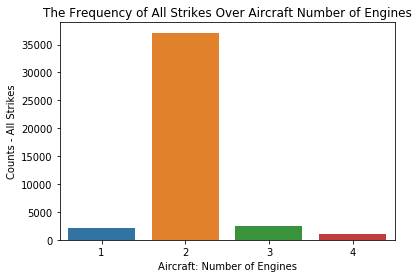

In [68]:
# plot the frequency of Aircraft: Number of engines?

count_air_type = DataFrame({'count' : bird.groupby( ['Aircraft: Number of engines?'] ).size()}).reset_index()

fig_air_type = sns.barplot(x=u'Aircraft: Number of engines?', y='count', 
                           data=count_air_type)


fig_air_type.set(xlabel='Aircraft: Number of Engines', ylabel='Counts - All Strikes');
fig_air_type.set_title('The Frequency of All Strikes Over Aircraft Number of Engines');

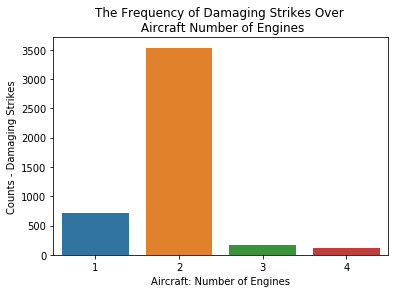

In [70]:
# Draw bar plot for the incidents reported with aircraft damage 
count_air_type0 = DataFrame({'count' : bird_dmg.groupby( ['Aircraft: Number of engines?'] ).size()}).reset_index()
count_air_type0['All Strikes Counts'] = count_air_type['count']
count_air_type0['Damage Rate'] = count_air_type0['count']/count_air_type0['All Strikes Counts']
# plot the frequency of Aircraft: Number of engines?
fig_air_type0 = sns.barplot(x=u'Aircraft: Number of engines?', y='count', data=count_air_type0)
fig_air_type0.set(xlabel='Aircraft: Number of Engines', ylabel='Counts - Damaging Strikes');
fig_air_type0.set_title('The Frequency of Damaging Strikes Over \n Aircraft Number of Engines');

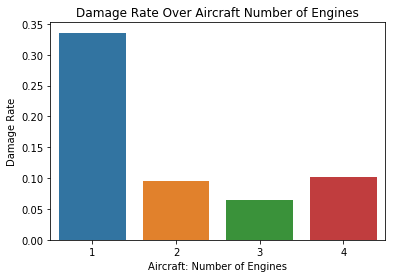

In [74]:
# plot the damage rate of Aircraft: Number of engines?
fig_air_type01 = sns.barplot(x=u'Aircraft: Number of engines?', y='Damage Rate', data=count_air_type0)
fig_air_type01.set(xlabel='Aircraft: Number of Engines', ylabel='Damage Rate');
fig_air_type01.set_title('Damage Rate Over Aircraft Number of Engines');

In [86]:
# Number of strikes reported based on the aircraft type
count_air_n_eng = DataFrame({'count':bird.groupby('Aircraft: Airline/Operator').size()}).reset_index()
count_air_n_eng.sort_values(['count'], ascending=0).head(10)

,Aircraft: Airline/Operator,count
277,UNKNOWN,16342
196,MILITARY,6108
253,SOUTHWEST AIRLINES,5995
72,BUSINESS,4305
134,FEDEX EXPRESS,3092
279,UPS AIRLINES,2898
275,UNITED AIRLINES,2805
45,AMERICAN AIRLINES,2102
111,DELTA AIR LINES,1573
250,SKYWEST AIRLINES,1569


In [88]:
# Number of strikes reported based on the aircraft type
count_air_n_eng0 = DataFrame({'count':bird_dmg.groupby('Aircraft: Airline/Operator').size()}).reset_index()
count_air_n_eng0.sort_values(['count'], ascending=0).head(10)

,Aircraft: Airline/Operator,count
42,BUSINESS,1220
153,SOUTHWEST AIRLINES,471
118,MILITARY,254
162,UNITED AIRLINES,248
138,PRIVATELY OWNED,241
165,UPS AIRLINES,197
25,AMERICAN AIRLINES,172
82,FEDEX EXPRESS,170
67,DELTA AIR LINES,169
101,JETBLUE AIRWAYS,113


In [92]:
# List the number of aircrafts based on make
count_air_make = DataFrame({'count' : bird.groupby('Aircraft: Make/Model').size()}).reset_index()
count_air_make.sort_values(['count'],ascending = 0).head(10)

,Aircraft: Make/Model,count
448,UNKNOWN,19540
49,B-737-700,3634
195,CL-RJ100/200,3133
45,B-737-300,2912
6,A-320,2825
58,B-757-200,2363
5,A-319,1967
2,A-300,1748
258,EMB-145,1618
50,B-737-800,1132


In [93]:
# List the number of damaged aircrafts based on make
count_air_make0 = DataFrame({'count' : bird_dmg.groupby('Aircraft: Make/Model').size()}).reset_index()
count_air_make0.sort_values(['count'],ascending = 0).head(10)

,Aircraft: Make/Model,count
41,B-737-700,278
38,B-737-300,268
49,B-757-200,236
6,A-320,225
145,CL-RJ100/200,208
5,A-319,171
307,UNKNOWN,161
98,C-172,149
181,EMB-145,122
2,A-300,115


Together, the analyses show that two-engine aircrafts are most frequently struck. But one-engine aircrafts are more prone to damages once struck.

### 3.2 What kinds of birds are involved in bird strikes? <a name="descriptive2"></a>

This section focuses on variables including _Wildlife: Size_, and _Wildlife: Species_ to describe the birds involved.

The following table shows the top 10 bird species involved in all strikes:

In [98]:
count_bird_size = DataFrame({'count':bird.groupby('Wildlife: Size').size()}).reset_index()
count_bird_size

,Wildlife: Size,count
0,Large,3416
1,Medium,18064
2,Small,35204


Text(0.5, 1.0, 'Size of wild life involved in strike vs # of incidents')

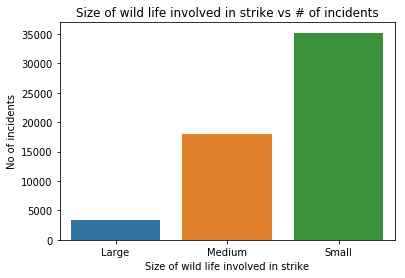

In [101]:
# wild life involved in the strikes reported
count_bird_size = DataFrame({'count':bird.groupby('Wildlife: Size').size()}).reset_index()

fig_bird_type = sns.barplot(x='Wildlife: Size',y='count', data=count_bird_size)
fig_bird_type.set(xlabel = 'Size of wild life involved in strike', ylabel = 'No of incidents')
fig_bird_type.set_title('Size of wild life involved in strike vs # of incidents')


Text(0.5, 1.0, 'Size of wild life involved in strike vs # of incidents')

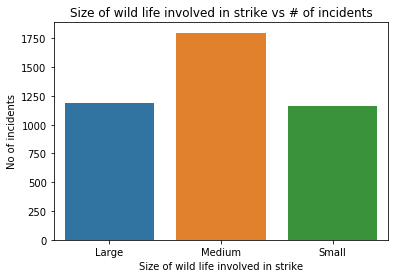

In [103]:
# Damage caused due to the wild life involved in the strikes reported
count_bird_size0 = DataFrame({'count':bird_dmg.groupby('Wildlife: Size').size()}).reset_index()
count_bird_size0['All Strike Count'] = count_bird_size['count']
count_bird_size0['Damage Rate']  = count_bird_size0['count']/count_bird_size0['All Strike Count']

fig_bird_type = sns.barplot(x='Wildlife: Size',y='count', data=count_bird_size0)
fig_bird_type.set(xlabel = 'Size of wild life involved in strike', ylabel = 'No of incidents')
fig_bird_type.set_title('Size of wild life involved in strike vs # of incidents')


Text(0.5, 1.0, 'Size of wild life involved in strike vs Damage Rate')

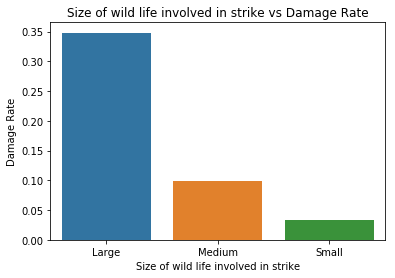

In [104]:
# Damage rate of the incidents reported with the wild life
fig_wild_damage = sns.barplot(x='Wildlife: Size',y='Damage Rate',data=count_bird_size0)

fig_wild_damage.set(xlabel= 'Size of wild life involved in strike', ylabel = 'Damage Rate')
fig_wild_damage.set_title('Size of wild life involved in strike vs Damage Rate')

In [109]:
# Check for the top 10 wild life species involved in the strike
count_bird_species = DataFrame({'count':bird.groupby('Wildlife: Species').size()}).reset_index()
count_bird_species.sort_values(['count'],ascending=0).head(10)


,Wildlife: Species,count
495,Unknown bird - small,12645
494,Unknown bird - medium,11513
319,Mourning dove,3265
496,Unknown bird or bat,3066
270,Killdeer,2188
11,American kestrel,1976
492,Unknown bird,1848
259,Horned lark,1670
31,Barn swallow,1639
186,European starling,1504


In [110]:
# Check for the top 10 wild life species involved in the strike and caused damage
count_bird_species0 = DataFrame({'count':bird_dmg.groupby('Wildlife: Species').size()}).reset_index()
count_bird_species0.sort_values(['count'],ascending=0).head(10)

,Wildlife: Species,count
221,Unknown bird - medium,1089
222,Unknown bird - small,518
220,Unknown bird - large,332
108,Gulls,209
44,Canada goose,192
239,White-tailed deer,171
219,Unknown bird,170
181,Red-tailed hawk,142
218,Turkey vulture,121
223,Unknown bird or bat,101


### 3.3 What are the flight statuses during bird strikes? <a name="descriptive3"></a>

Several variables in the data set can be used to answer this question, including the altitude of the aircraft (_Altitude bin_ and _Feet above ground_), the phase of the flight (_When: Phase of flight_), the speed of the flight (_Speed (IAS) in knots_), and the distance of the aircraft from the airport (_Miles from airport_).

First, altitude information of all strikes is listed in a table.

Text(0.5, 1.0, 'Altitude vs a/c count')

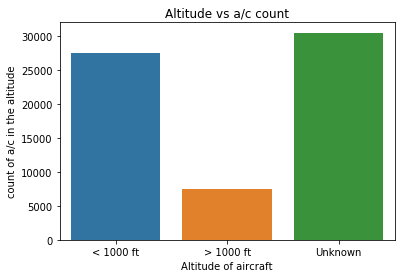

In [113]:
# # of incidents recorded at each altitude bins available
count_alt = DataFrame({'count':bird.groupby('Altitude bin').size()}).reset_index()

fig_alt = sns.barplot(x='Altitude bin',y='count',data=count_alt)
fig_alt.set(xlabel = 'Altitude of aircraft',ylabel='count of a/c in the altitude')
fig_alt.set_title('Altitude vs a/c count')

In [118]:
count_alt

,Altitude bin,count
0,< 1000 ft,27523
1,> 1000 ft,7546
2,Unknown,30541


Text(0.5, 1.0, 'Altitude vs a/c count')

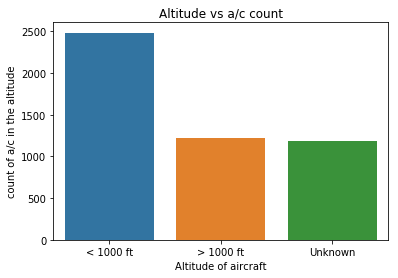

In [115]:
# # of incidents recorded that damaged a/c at each altitude bins available
count_alt0 = DataFrame({'count':bird_dmg.groupby('Altitude bin').size()}).reset_index()

fig_alt_dmg = sns.barplot(x='Altitude bin',y='count',data=count_alt0)
fig_alt_dmg.set(xlabel = 'Altitude of aircraft',ylabel='count of a/c in the altitude')
fig_alt_dmg.set_title('Altitude vs a/c count')

In [117]:
bird['When: Phase of flight'].isna().sum()

24559

Text(0.5, 1.0, 'Phase of flight vs incidents observed')

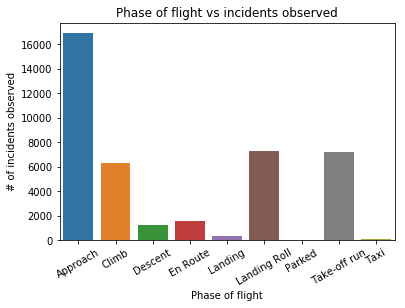

In [129]:
# Retrieve # of incident details based on the phase of flight information
count_phase_info = DataFrame({'count':bird.groupby('When: Phase of flight').size()}).reset_index()

fig_count_phase = sns.barplot(x='When: Phase of flight',y='count',data=count_phase_info)
fig_count_phase.set_xticklabels(labels=count_phase_info['When: Phase of flight'],rotation=30);
fig_count_phase.set(xlabel='Phase of flight', ylabel='# of incidents observed')
fig_count_phase.set_title('Phase of flight vs incidents observed')


Text(0.5, 1.0, 'Phase of flight vs incidents observed')

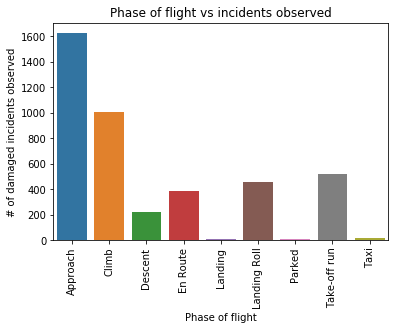

In [140]:
# Retrieve # of incident details that caused a/c damage based on the phase of flight information
count_phase_info0 = DataFrame({'count':bird_dmg.groupby('When: Phase of flight').size()}).reset_index()

fig_count_phase0 = sns.barplot(x='When: Phase of flight',y='count',data=count_phase_info0)
fig_count_phase0.set(xlabel='Phase of flight', ylabel='# of damaged incidents observed')
plt.setp(fig_count_phase0.get_xticklabels(), rotation=90)
fig_count_phase0.set_title('Phase of flight vs incidents observed')

Text(0.5, 1.0, 'Phase of flight vs AGL')

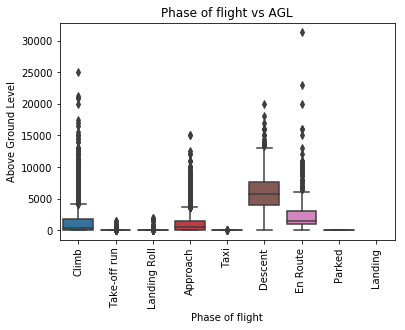

In [138]:
# Draw box plot to see the a/c altitude when the strike is reported
fig_agl = sns.boxplot(x='When: Phase of flight',y='Feet above ground',data=bird)
fig_agl.set_xticklabels(fig_agl.get_xticklabels(), rotation=90);
fig_agl.set(xlabel='Phase of flight',ylabel='Above Ground Level')
fig_agl.set_title('Phase of flight vs AGL')

Text(0.5, 1.0, 'Phase of flight vs AGL')

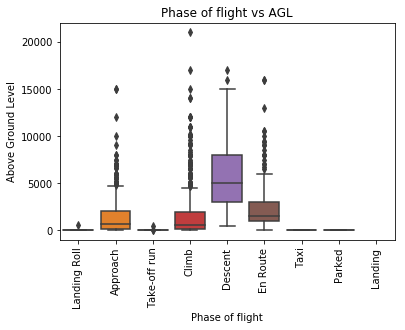

In [139]:
# Draw box plot to see the a/c altitude when the strike with damage is reported

fig_agl0 = sns.boxplot(x='When: Phase of flight',y='Feet above ground',data=bird_dmg)
fig_agl0.set_xticklabels(fig_agl0.get_xticklabels(), rotation=90);
fig_agl0.set(xlabel='Phase of flight',ylabel='Above Ground Level')
fig_agl0.set_title('Phase of flight vs AGL')

Text(0.5, 1.0, 'Phase of flight vs Miles from Airport')

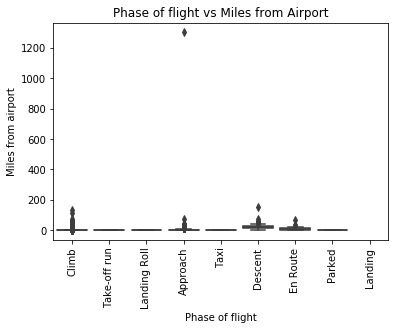

In [141]:
# Draw box plot to see the a/c distance from the airport when the strike is reported

fig_dist = sns.boxplot(x='When: Phase of flight',y='Miles from airport',data=bird)
fig_dist.set_xticklabels(fig_dist.get_xticklabels(), rotation=90);
fig_dist.set(xlabel='Phase of flight',ylabel='Miles from airport')
fig_dist.set_title('Phase of flight vs Miles from Airport')

Text(0.5, 1.0, 'Phase of flight vs Miles from Airport')

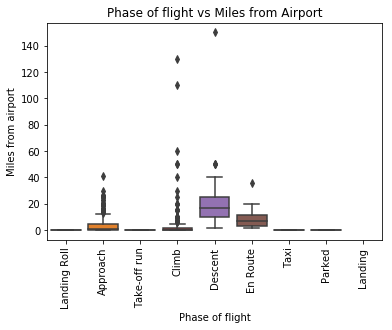

In [142]:
# Draw box plot to see the a/c distance from the airport when the strike reported is resulted to a/c damage
fig_dist0 = sns.boxplot(x='When: Phase of flight',y='Miles from airport',data=bird_dmg)
fig_dist0.set_xticklabels(fig_dist0.get_xticklabels(), rotation=90);
fig_dist0.set(xlabel='Phase of flight',ylabel='Miles from airport')
fig_dist0.set_title('Phase of flight vs Miles from Airport')

Text(0.5, 1.0, 'Miles from airport vs AGL')

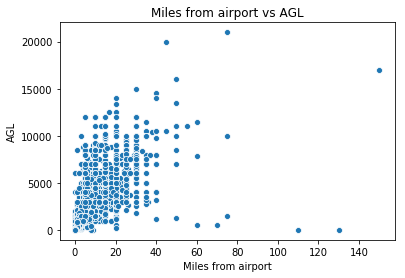

In [148]:
# Draw scatter plot of altitude vs distance
bird1 = bird.loc[(~bird['Miles from airport'].isnull()) &
                        (~bird['Feet above ground'].isnull()) ]
fig_alt_dist = sns.scatterplot(x='Miles from airport',y='Feet above ground',data=bird1)
fig_alt_dist.set(xlabel = 'Miles from airport',ylabel='AGL')
fig_alt_dist.set_title('Miles from airport vs AGL')

Text(0.5, 1.0, 'Miles from airport vs AGL')

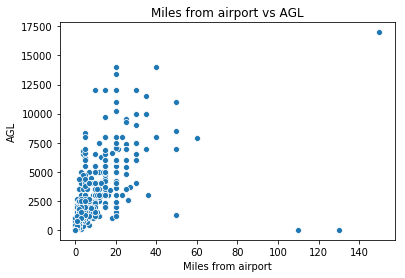

In [150]:
# Draw scatter plot of altitude vs distance for damaged strikes
bird2 = bird_dmg.loc[(~bird_dmg['Miles from airport'].isnull()) &
                        (~bird_dmg['Feet above ground'].isnull()) ]
fig_alt_dist0 = sns.scatterplot(x='Miles from airport',y='Feet above ground',data=bird2)
fig_alt_dist0.set(xlabel = 'Miles from airport',ylabel='AGL')
fig_alt_dist0.set_title('Miles from airport vs AGL')

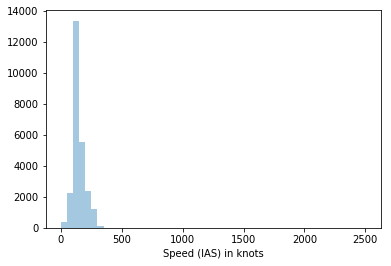

In [163]:
# Draw histogram of the speeds reported during the strike time
fig_spd_plt = sns.distplot(bird['Speed (IAS) in knots'].dropna(),kde=False)

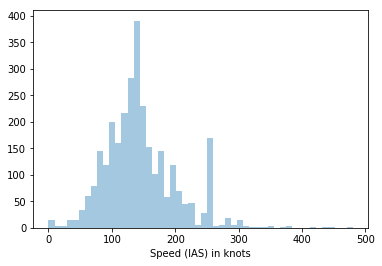

In [164]:
# Draw histogram of the speeds reported for damaged strikes
fig_spd_plt0 = sns.distplot(bird_dmg['Speed (IAS) in knots'].dropna(),kde=False)

### 3.4 What are the geological locations of bird strikes? <a name="descriptive5"></a>

_Airport: Name_ will be analyzed for this question. The table below shows the top 10 airports of all bird strikes.  

In [168]:
count_apt = DataFrame({'count':bird.groupby('Airport: Name').size()}).reset_index()
count_apt.sort_values('count',ascending=False).head(10)

,Airport: Name,count
1336,UNKNOWN,5989
312,DENVER INTL AIRPORT,2351
285,DALLAS/FORT WORTH INTL ARPT,1819
825,MEMPHIS INTL,1234
630,JOHN F KENNEDY INTL,1228
220,CHICAGO O'HARE INTL ARPT,1124
1132,SACRAMENTO INTL,1041
758,LOUISVILLE INTL ARPT,964
1138,SALT LAKE CITY INTL,849
647,KANSAS CITY INTL,846


In [171]:
count_apt0 = DataFrame({'count':bird_dmg.groupby('Airport: Name').size()}).reset_index()
count_apt0.sort_values('count',ascending=False).head(20)

,Airport: Name,count
842,UNKNOWN,871
712,SACRAMENTO INTL,120
610,ORLANDO INTL,88
716,SALT LAKE CITY INTL,83
383,JOHN F KENNEDY INTL,80
512,MEMPHIS INTL,79
202,DENVER INTL AIRPORT,79
139,CHICAGO O'HARE INTL ARPT,72
184,DALLAS/FORT WORTH INTL ARPT,51
721,SAN FRANCISCO INTL ARPT,47


### 3.5 What times do bird strikes occur? <a name="descriptive6"></a>

Three variables, including _FlightDate_, _When: Time (HHMM)_, and _When: Time of day_, are used to answer this question. First, the flight date variable is engineered into two features: the year of the flight and the month of the flight. Year information can be used to understand the trend of bird strikes over time, while the month information along with migration input can be used to understand whether bird migration plays a key role in bird strikes.

First, a heatmap of strike frequency over flight month and flight year is shown for all strikes:

In [176]:
# Time of the incident reported
count_time = DataFrame({'count':bird.groupby('When: Time of day').size()}).reset_index()
count_time.sort_values('count',ascending=False).head(10)

,When: Time of day,count
1,Day,25269
3,Night,13623
2,Dusk,1759
0,Dawn,1207


In [177]:
# Time of the incident that resulted a/c damage
count_time0 = DataFrame({'count':bird_dmg.groupby('When: Time of day').size()}).reset_index()
count_time0.sort_values('count',ascending=False).head(10)

,When: Time of day,count
1,Day,2500
3,Night,1458
2,Dusk,185
0,Dawn,118


In [182]:
# month variable
bird['Flight Month'] = pd.DatetimeIndex(bird['FlightDate']).month
# year variable
bird['Flight Year'] = pd.DatetimeIndex(bird['FlightDate']).year

# subset the data with any damage or negative impact to the flight
bird_dmg = bird.loc[(bird['Effect: Indicated Damage'] != 'No damage') | 
                    (bird['Cost: Total $'] > 0) ]

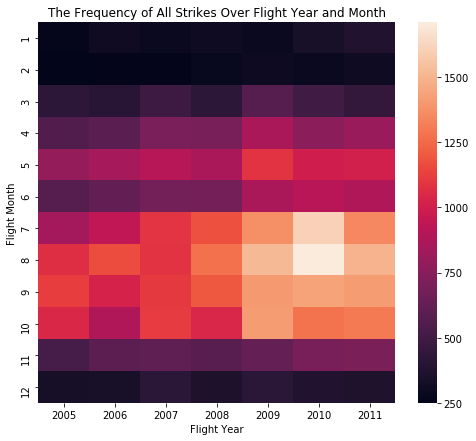

In [180]:
# count over flight month and year
count_time = DataFrame({'count' : bird.groupby( ['Flight Month', 'Flight Year'] ).size()}).reset_index()
# reshape frame
count_time_p=count_time.pivot("Flight Month", "Flight Year", "count")
# plot the frequency over month and year in a heat map
plt.figure(figsize=(8, 7))
heat_time = sns.heatmap(count_time_p);
heat_time.set_title('The Frequency of All Strikes Over Flight Year and Month');

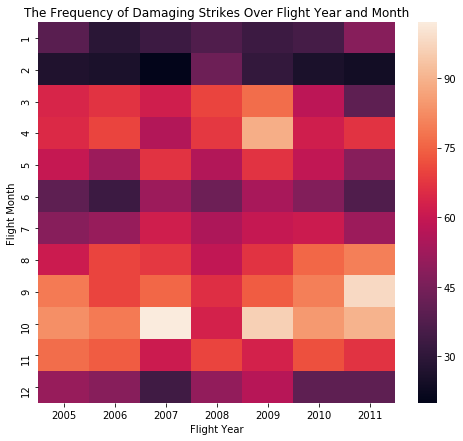

In [183]:
# count over flight month and year
count_time0 = DataFrame({'count' : bird_dmg.groupby( ['Flight Month', 'Flight Year'] ).size()}).reset_index()
# reshape frame
count_time_p0=count_time0.pivot("Flight Month", "Flight Year", "count")
# plot the frequency over month and year in a heat map
plt.figure(figsize=(8, 7))
heat_time0 = sns.heatmap(count_time_p0);
heat_time0.set_title('The Frequency of Damaging Strikes Over Flight Year and Month');

In [189]:
# count over flight month and year
count_time1 = DataFrame({'count' : bird_dmg.groupby( ['Flight Month', 'Flight Year'] ).size()}).reset_index()
count_time_p1=count_time0.pivot("Flight Month", "Flight Year", "count")
count_time_p1


Flight Year,2005,2006,2007,2008,2009,2010,2011
Flight Month,,,,,,,
1,39,29,33,37,33,35,48
2,27,26,20,43,31,26,24
3,64,67,62,70,77,58,40
4,65,70,56,68,89,62,67
5,60,52,67,56,67,59,48
6,40,33,52,43,54,47,37
7,48,51,62,55,60,61,52
8,61,70,68,59,67,76,80
9,79,70,76,66,74,80,98


Together, the above analyses show that bird strikes happen mostly between July and October, with an increasing trend from year 2000 to year 2011. The increasing trend over the years could be due to increasing air traffic. Damaging strikes can also happen between March and May, with a relatively stable trend over the years.

A histogram below shows the frequency of strikes over the time of the day in HHMM format:

Text(0.5, 1.0, 'The Frequency of All Strikes Over Time of the Day')

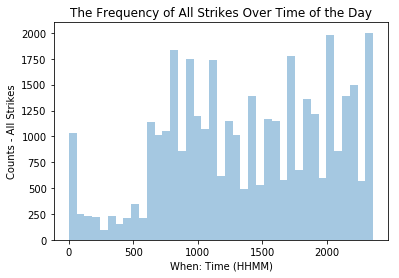

In [195]:
# Histogram of the time information

time_hist = sns.distplot(bird['When: Time (HHMM)'].dropna(),kde=False)
time_hist.set(ylabel='Counts - All Strikes')
time_hist.set_title('The Frequency of All Strikes Over Time of the Day')

Text(0.5, 1.0, 'The Frequency of All Strikes Over Time of the Day')

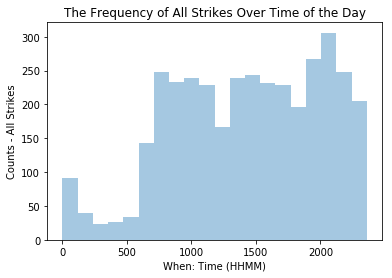

In [196]:
# Histogram of the time information

time_hist0 = sns.distplot(bird_dmg['When: Time (HHMM)'].dropna(),kde=False)
time_hist0.set(ylabel='Counts - All Strikes')
time_hist0.set_title('The Frequency of All Strikes Over Time of the Day')

### 3.6 What are the consequences of bird strikes? <a name="descriptive7"></a>

Several aspects of the consequences are considered, including financial cost (_Cost: Total \$_) and damage (_Effect: Indicated Damage_).

First, a histogram of total financial cost is shown below for all strikes. Note that the x axis is log-transformed so that the distribution is not too sparse toward the high end of cost. Only strikes with costs greater than $0 are included.

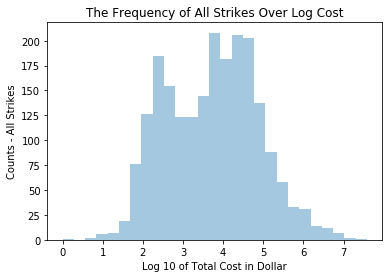

In [197]:
# cost histogram
cost = sns.distplot(np.log10(bird.loc[bird['Cost: Total $']>0,'Cost: Total $']),kde=False);
cost.set(xlabel='Log 10 of Total Cost in Dollar', ylabel='Counts - All Strikes');
cost.set_title('The Frequency of All Strikes Over Log Cost');

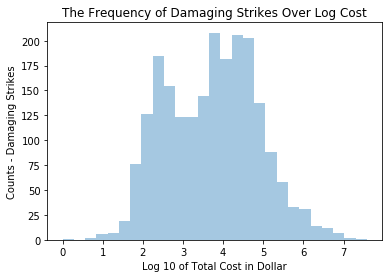

In [202]:
# cost histogram
cost0 = sns.distplot(np.log10(bird_dmg.loc[bird_dmg['Cost: Total $']>0,'Cost: Total $']),kde=False);
cost0.set(xlabel='Log 10 of Total Cost in Dollar', ylabel='Counts - Damaging Strikes');
cost0.set_title('The Frequency of Damaging Strikes Over Log Cost');

The two histograms above are fairly similar, since most damaging strikes involve some sort of financial cost and vice versa. The table below shows a count of damage vs. no-damage strikes.

In [206]:
# damage count table
cnt_damage = DataFrame({'count' : bird.groupby( ['Effect: Indicated Damage'] ).size()}).reset_index()
cnt_damage['Damage Rate']=cnt_damage['count']/bird.shape[0]
cnt_damage

,Effect: Indicated Damage,count,Damage Rate
0,Caused damage,4075,0.062109
1,No damage,61535,0.937891


Together, these statistics show that most of the strikes do not cause damages (93.7%). However, bird strikes can cost money and even human lives at times.

### 4. Inferential Statistics <a name="inferential"></a>

In this section, damaging/non-damaging bird strikes will be classified using five models including Logistic Regression, Support Vector Machines, Random Forests, K-Nearest Neighbors, and Gaussian Naive Bayes. Training accuracy, testing accuracy, and cross-validation accuracy will be used to check the fit of the model.

First, I will resample the data such that we have a balanced dataset. Given the large amount of missing values and the large sample size, entries with missing values are removed.

In [207]:
bird['Damage'] = 0
bird.loc[(bird['Effect: Indicated Damage'] != 'No damage') | 
                    (bird['Cost: Total $'] > 0) ,'Damage'] = 1

In [208]:
bird['Damage'].value_counts()

0    60714
1     4896
Name: Damage, dtype: int64

In [209]:
# define independent and dependent variables
X = ['Aircraft: Number of engines?',
     'Wildlife: Size',
     'When: Phase of flight','Feet above ground','Miles from airport','Speed (IAS) in knots',
     'Flight Month','Flight Year','When: Time (HHMM)',
     'Pilot warned of birds or wildlife?']
Y = ['Damage']

# clean missing data, keep those with values on key metrics
bird_keep = bird[np.concatenate((X,Y))].dropna(how='any')

In [215]:
# Create data frame with same number of damaged and normal incidents

# list of damage indices
damage_index = np.array(bird_keep[bird_keep["Damage"]==1].index)

# getting the list of normal indices from the full dataset
normal_index = bird_keep[bird_keep["Damage"]==0].index

No_of_damage = len(bird_keep[bird_keep["Damage"]==1])

# choosing random normal indices equal to the number of damaging strikes
normal_indices = np.array( np.random.choice(normal_index, No_of_damage, replace= False) )

# concatenate damaging index and normal index to create a list of indices
undersampled_indices = np.concatenate([damage_index, normal_indices])


In [222]:
# add dummy variables for categorical variables
wildlife_dummies = pd.get_dummies(bird_keep['Wildlife: Size'])
bird_keep = bird_keep.join(wildlife_dummies)

phase_dummies = pd.get_dummies(bird_keep['When: Phase of flight'])
bird_keep = bird_keep.join(phase_dummies)

warn_dummies = pd.get_dummies(bird_keep['Pilot warned of birds or wildlife?'])
bird_keep = bird_keep.join(warn_dummies)

#  convert engine number to numeric
bird_keep['Aircraft: Number of engines?'] = pd.to_numeric(bird_keep['Aircraft: Number of engines?'])

# scale variables before fitting our model to our dataset
# flight year scaled by subtracting the minimum year
bird_keep["Flight Year"] = bird_keep["Flight Year"] - min(bird_keep["Flight Year"])
# scale time by dividing 100 and center to the noon
bird_keep["When: Time (HHMM)"] = bird_keep["When: Time (HHMM)"]/100-12
# scale speed
bird_keep["Speed (IAS) in knots"] = scale( bird_keep["Speed (IAS) in knots"], axis=0, with_mean=True, with_std=True, copy=False )

In [223]:
# use the undersampled indices to build the undersampled_data dataframe
undersampled_bird = bird_keep.loc[undersampled_indices, :]

# drop original values after dummy variables added
bird_use = undersampled_bird.drop(['Wildlife: Size','When: Phase of flight',
     'Pilot warned of birds or wildlife?'],axis=1)

In [225]:
# scale the X_train and X_test
X_use = bird_use.drop("Damage",axis=1)
standard_scaler = StandardScaler().fit(X_use)
X_use1 = standard_scaler.transform(X_use) # Xs is the scaled matrix but has lost the featuren names
X_use2 = pd.DataFrame(X_use1, columns=X_use.columns) # Add feature names

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aaradhya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [257]:
# define training and testing sets
# choosing random indices equal to the number of damaging strikes
train_indices = np.array( np.random.choice(X_use2.index, int((X_use2.shape[0]/2)), replace= False) )
test_indices = np.array([item for item in X_use2.index if item not in train_indices])

# choosing random indices equal to the number of damaging strikes
bird_use = bird_use.reset_index()
X_train = X_use2.loc[train_indices,]
Y_train = bird_use.loc[train_indices,'Damage']
X_test = X_use2.loc[test_indices,]
Y_test = bird_use.loc[test_indices,'Damage']

### 4.1 Logistic Regression<a name="inferential1"></a>

In [265]:
# Logistic Regression using Scikit-learn
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
print('Training Accuracy: %1.3f.' % logreg.score(X_train, Y_train))


Training Accuracy: 0.712.


C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [266]:
# get accuracy score
logreg_t = metrics.accuracy_score(Y_test,Y_pred)
print('Accuracy score: %1.3f '%logreg_t)

Accuracy score: 0.692 


In [235]:
# evaluate the model using 10-fold cross-validation
scores_lr = cross_val_score(logreg, X_train, Y_train, scoring='accuracy', cv=10)
print('Cross-Validation Accuracy: %1.3f.' % scores_lr.mean())

Cross-Validation Accuracy: 0.691.


C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

In [236]:
# ROC AUC on train set
Y_prob_train = logreg.predict_proba(X_train)
lr_auc_train = metrics.roc_auc_score(Y_train, Y_prob_train[:, 1])
print ("ROC AUC on train set: %1.3f." % lr_auc_train)

# Predict on validation set
Y_prob_test = logreg.predict_proba(X_test)
lr_auc_test = metrics.roc_auc_score(Y_test, Y_prob_test[:, 1])
print ("ROC AUC on validation set: %1.3f." % lr_auc_test)

ROC AUC on train set: 0.763.
ROC AUC on validation set: 0.741.


In [237]:
# logistic regression using statsmodels
logit = sm.Logit(bird_use["Damage"].reset_index(drop=True), X_use2)
result = logit.fit()
result.summary()

         Current function value: 0.579806
         Iterations: 35


C:\Users\Aaradhya\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Aaradhya\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Aaradhya\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Aaradhya\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Aaradhya\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Damage   No. Observations:                 1690
Model:                          Logit   Df Residuals:                     1673
Method:                           MLE   Df Model:                           16
Date:                Sun, 01 Dec 2019   Pseudo R-squ.:                  0.1635
Time:                        09:31:06   Log-Likelihood:                -979.87
converged:                      False   LL-Null:                       -1171.4
                                        LLR p-value:                 1.264e-71
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Aircraft: Number of engines?    -0.0006      0.063     -0.010      0.992      -0.124       0.123
Feet above ground               -0.1757      0.115     -1.533      0.125      -0.400       0.049
Miles from airport               0.0852      0.117      0.730      0.466      -0.144       0.314
Speed (IAS) in knots            -0.1446      0.095     -1.524      0.127      -0.330       0.041
Flight Month                    -0.0549      0.055     -0.994      0.320      -0.163       0.053
Flight Year                     -0.0646      0.057     -1.133      0.257      -0.176       0.047
When: Time (HHMM)                0.1017      0.057      1.786      0.074      -0.010       0.213
Large                            0.5959        nan        nan        nan         nan         nan
Medium                           0.0933        nan        nan        nan         nan         nan
Small                           -0.5418        nan        nan        nan         nan         nan
Approach                         0.0047   4.37e+06   1.07e-09      1.000   -8.56e+06    8.56e+06
Climb                            0.1342   3.42e+06   3.92e-08      1.000   -6.71e+06    6.71e+06
Descent                          0.1444   1.73e+06   8.32e-08      1.000    -3.4e+06     3.4e+06
En Route                         0.0309   5.45e+05   5.66e-08      1.000   -1.07e+06    1.07e+06
Landing Roll                    -0.2238   3.75e+06  -5.97e-08      1.000   -7.35e+06    7.35e+06
Parked                           0.0239   3.85e+05   6.19e-08      1.000   -7.56e+05    7.56e+05
Take-off run                     0.0315   3.82e+06   8.23e-09      1.000   -7.49e+06    7.49e+06
Taxi                            -0.0750   4.97e+05  -1.51e-07      1.000   -9.75e+05    9.75e+05
N                                0.0482        nan        nan        nan         nan         nan
Y                               -0.0482        nan        nan        nan         nan         nan
================================================================================================
"""

In [238]:
# check significance of the features
features_coefs = result.params.sort_values(ascending=False)
selectSignificant = result.pvalues[result.pvalues <= 0.05].index
selectSignificant

Index([], dtype='object')

### 4.2 Support Vector Machines <a name="inferential2"></a>

In [267]:
svc = SVC(class_weight='balanced',probability=True)
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)

print('Training Accuracy: %1.3f.' % svc.score(X_train, Y_train))

Training Accuracy: 0.755.


C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [268]:
svc_t = metrics.accuracy_score(Y_test,Y_pred)
print('Testing Accuracy : %1.3f.' %svc_t)

Testing Accuracy : 0.685.


In [242]:
# evaluate the model using 10-fold cross-validation
scores_svc = cross_val_score(svc, X_train, Y_train, scoring='accuracy', cv=10)
print('Cross-Validation Accuracy: %1.3f.' % scores_svc.mean())

C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Aaradhya\Anaconda3\lib\site-packages\sklearn\svm\base.py:196:

Cross-Validation Accuracy: 0.701.


In [243]:
# ROC AUC on train set
Y_prob_train = svc.predict_proba(X_train)
svc_auc_train = metrics.roc_auc_score(Y_train, Y_prob_train[:, 1])
print ("ROC AUC on train set: %1.3f." % svc_auc_train)

# Predict on validation set
Y_prob_test = svc.predict_proba(X_test)
svc_auc_test = metrics.roc_auc_score(Y_test, Y_prob_test[:, 1])
print ("ROC AUC on validation set: %1.3f." % svc_auc_test)

ROC AUC on train set: 0.819.
ROC AUC on validation set: 0.735.


### 4.3 Random Forests <a name="inferential3"></a>

In [244]:
# Random Forests
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
print('Training Accuracy: %1.3f.' % rf.score(X_train, Y_train))

Training Accuracy: 1.000.


In [269]:
rf_t = metrics.accuracy_score(Y_test,Y_pred)
print('Testing Accuracy : %1.3f.' %rf_t)

Testing Accuracy : 0.685.


In [246]:
# evaluate the model using 10-fold cross-validation
scores_rf = cross_val_score(rf, X_train, Y_train, scoring='accuracy', cv=10)
print('Cross-Validation Accuracy: %1.3f.' % scores_rf.mean())

Cross-Validation Accuracy: 0.660.


In [247]:
# ROC AUC on train set
Y_prob_train = rf.predict_proba(X_train)
rf_auc_train = metrics.roc_auc_score(Y_train, Y_prob_train[:, 1])
print ("ROC AUC on train set: %1.3f." % rf_auc_train)

# Predict on validation set
Y_prob_test = rf.predict_proba(X_test)
rf_auc_test = metrics.roc_auc_score(Y_test, Y_prob_test[:, 1])
print ("ROC AUC on validation set: %1.3f." % rf_auc_test)

ROC AUC on train set: 1.000.
ROC AUC on validation set: 0.714.


<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

### 4.4 K-Nearest Neighbors Classifier <a name="inferential4"></a>

In [251]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)

print('training accuracy %1.3f.' %knn.score(X_train,Y_train))

training accuracy 0.781.


In [270]:
knn_t = metrics.accuracy_score(Y_test,Y_pred)
print('test accuracy %1.3f.' %knn_t)

test accuracy 0.685.


In [273]:
scores_knn = cross_val_score(knn, X_train, Y_train, scoring='accuracy', cv=10)
print('Cross-Validation Accuracy: %1.3f.' % scores_knn.mean())

Cross-Validation Accuracy: 0.692.


In [255]:
Y_prob_train = knn.predict_proba(X_train)
knn_auc_train = metrics.roc_auc_score(Y_train,Y_prob_train[:,1])

print('train roc auc score is %1.3f.'%knn_auc_train)

Y_prob_test = knn.predict_proba(X_test)
knn_auc_test = metrics.roc_auc_score(Y_test,Y_prob_test[:,1])

print('train roc auc score is %1.3f.'%knn_auc_test)


train roc auc score is 0.862.
train roc auc score is 0.690.


### 4.5 Gaussian Naive Bayes <a name="inferential5"></a>

In [258]:
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred= nb.predict(X_test)

print('train accuracy score %1.3f.'%nb.score(X_train,Y_train))

train accuracy score 0.670.


In [271]:
nb_t = metrics.accuracy_score(Y_test,Y_pred)
print('test accuracy score %1.3f.'%nb_t)

test accuracy score 0.685.


In [274]:
scores_nb = cross_val_score(nb, X_train, Y_train, scoring='accuracy', cv=10)
print('Cross-Validation Accuracy: %1.3f.' % scores_nb.mean())

Cross-Validation Accuracy: 0.594.


In [275]:
Y_prob_train = nb.predict_proba(X_train)
nb_auc_train = metrics.roc_auc_score(Y_train,Y_prob_train[:,1])

print('Train AUC roc value is %1.3f.'%nb_auc_roc_train)

Y_prob_test = nb.predict_proba(X_test)
nb_auc_test = metrics.roc_auc_score(Y_test,Y_prob_test[:,1])

print('Train AUC roc value is %1.3f.'%nb_auc_roc_test)


Train AUC roc value is 0.761.
Train AUC roc value is 0.708.


### 5. Model Summary <a name="inferential6"></a>

In [276]:
train_acc = [logreg.score(X_train, Y_train), svc.score(X_train, Y_train), rf.score(X_train, Y_train),
             knn.score(X_train, Y_train), nb.score(X_train, Y_train)]

test_acc = [logreg_t,svc_t,rf_t,knn_t,nb_t]

cross_val_acc = [scores_lr.mean(), scores_svc.mean(), scores_rf.mean(), scores_knn.mean(), scores_nb.mean()]
train_auc = [lr_auc_train, svc_auc_train, rf_auc_train, knn_auc_train, nb_auc_train]
test_auc = [lr_auc_test, svc_auc_test, rf_auc_test, knn_auc_test, nb_auc_test]
models = DataFrame({'Training Accuracy': train_acc, 'Testing Accuracy': test_acc, 
                    "Cross-Validation Accuracy": cross_val_acc,'Training AUC': train_auc,
                   'Testing AUC': test_auc})
models.index = ['Logistic Regression','Support Vector Machines ','Random Forests','K-Nearest Neighbors','Gaussian Naive Bayes']
models

,Training Accuracy,Testing Accuracy,Cross-Validation Accuracy,Training AUC,Testing AUC
Logistic Regression,0.712426,0.692308,0.691155,0.762954,0.741344
Support Vector Machines,0.755030,0.685207,0.700651,0.818939,0.734619
Random Forests,0.850888,0.685207,0.660327,1.000000,0.714074
K-Nearest Neighbors,0.743195,0.685207,0.692274,0.861509,0.689776
Gaussian Naive Bayes,0.669822,0.685207,0.594229,0.760976,0.707926


In [280]:
models1 = DataFrame({'Accuracy' : models.unstack()}).reset_index()
models1

,level_0,level_1,Accuracy
0,Training Accuracy,Logistic Regression,0.712426
1,Training Accuracy,Support Vector Machines,0.755030
2,Training Accuracy,Random Forests,0.850888
3,Training Accuracy,K-Nearest Neighbors,0.743195
4,Training Accuracy,Gaussian Naive Bayes,0.669822
5,Testing Accuracy,Logistic Regression,0.692308
6,Testing Accuracy,Support Vector Machines,0.685207
7,Testing Accuracy,Random Forests,0.685207
8,Testing Accuracy,K-Nearest Neighbors,0.685207
9,Testing Accuracy,Gaussian Naive Bayes,0.685207


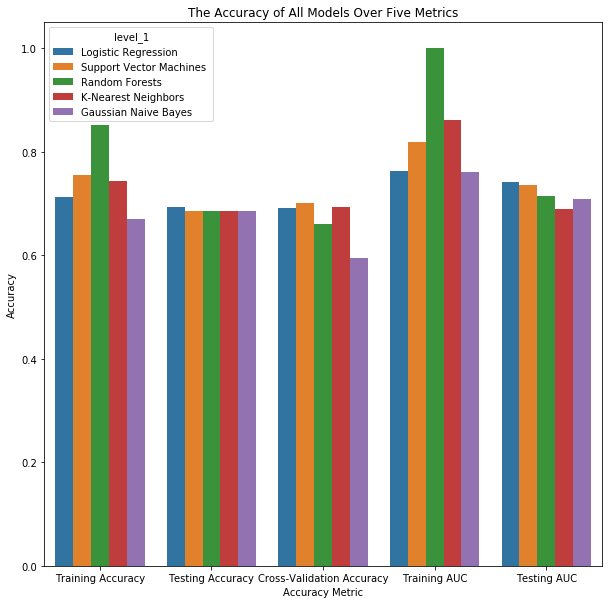

In [284]:
models1 = DataFrame({'Accuracy' : models.unstack()}).reset_index()
# plot accuracies
plt.figure(figsize=(10, 10))
fig_models = sns.barplot(x='level_0', y='Accuracy', hue='level_1', data=models1);
#fig_models.set_xticklabels(labels=models1['level_0'],rotation=90)
fig_models.set(xlabel='Accuracy Metric', ylabel='Accuracy');
fig_models.set_title('The Accuracy of All Models Over Five Metrics');

Based on the cross-validation and testing accuracies, the two most important metrics in model prediction among the three considered here, the Logistic Regression model yields the best performance. 

It is noteworthy that the Random Forests model performs slightly worse than the Logistic Regression on the metrics of cross-validation and testing accuracies. However, the Random Forests model has the highest training accuracy among all models. This suggests a potential model overfit.

In summary, the logistic regression model outperforms other models and can be chosen as a model for prediction and warning system for pilots and operators.

### 5.1 Correlation Coefficients <a name="inferential7"></a>

The table below shows the coefficients, sorted by their absolute value in descending order.

In [285]:
x=zip(X_train.columns, np.transpose(logreg.coef_))
x1=pd.DataFrame(list(x))
x1.head()

,0,1
0,Aircraft: Number of engines?,[-0.06703374193892792]
1,Feet above ground,[-0.01209018318836889]
2,Miles from airport,[0.02274118922069798]
3,Speed (IAS) in knots,[-0.1057073112788105]
4,Flight Month,[-0.042575630174930656]


In [286]:
# get Correlation Coefficient for each feature using Logistic Regression
logreg_df = pd.DataFrame(list(zip(X_train.columns, np.transpose(logreg.coef_))))
logreg_df.columns = ['Features','Coefficient Estimate']
logreg_df['sort'] = logreg_df['Coefficient Estimate'].abs()
logreg_df.sort_values(['sort'],ascending=0).drop('sort',axis=1).head(10)

,Features,Coefficient Estimate
7,Large,[0.5892255029221463]
9,Small,[-0.5197809461047227]
5,Flight Year,[-0.20250745423621355]
6,When: Time (HHMM),[0.18586454367225985]
14,Landing Roll,[-0.18341304182558513]
11,Climb,[0.1374155007103925]
3,Speed (IAS) in knots,[-0.1057073112788105]
19,Y,[-0.09532129844781213]
18,N,[0.09532129844781213]
8,Medium,[0.0740122028050838]


### 6. Conclusions and Suggestions<a name="conclusion"></a>

1. Two-engine aircrafts are most frequently struck, but one-engine aircrafts are more prone to damage once struck. Such aircrafts should be equipped and operated with caution on this regard.
2. Small birds are the most frequently involved in bird strikes, but medium and large birds are more damaging once involved. Airports built near migration route of medium to large-size birds should have more countermeasures in place.
3. Bird strikes happen most often during takeoff or landing, especially the approach phase (when few countermeasures are in place), and during low altitude and low speed flights. Pilots should be informed with bird information during the approach phase if possible.
4. Sacramento International Airport stands out as the airport with most damaging bird strikes. More information on the airport would be needed to understand the cause, e.g. bird migration routes, airport traffic, bird control measures etc.
5. Bird strikes happen mostly between March to May, and July to October, between 5am and 1am of the next day. If resources are limited, detection and countermeasures should be optimized during such times to prevent bird strikes as much as possible.
6. Most of the strikes do not cause damages. However, bird strikes can cost money and even human lives at times.
7. Among the models tested, logistic regression model outperforms other models and can be chosen as a model for prediction and warning system for pilots and other operators. However, missing data is a huge issue with this data set, it would be useful to have the records as complete as possible so that a higher prediction accuracy can be achieved.